# Importing the libraries

In [1]:
import string

# data manipulation & vizualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# nltk imports
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# spell check library
from autocorrect import spell

# sklearn imports
from sklearn import ensemble
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading the given dataset

* reading the given csv file using pd.read_csv
* displaying the top 3 rows to a general idea of data in the file
* displaying the shape of the data
* separating the product category column (target), description column (main feature) in another dataframe 

In [33]:
data = pd.read_csv("dataset/flipkart_com-ecommerce_sample.csv")

data.head(3)

C:\Users\kusha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [3]:
# printing the shape of the dataframe 

print(data.shape)

(20000, 15)


In [4]:
# separating the product category column, description column in another dataframe

df = data[["product_category_tree", "description"]]

df.head(3)

,product_category_tree,description
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...


# Handling NaN values

* first printing the df.isnull().sum() to find out how many null values are there in each column 
* there are only two 2 nan in description column, so I use dropna to delete those rows

In [5]:
# sum of nan values in each column

df.isnull().sum()

product_category_tree    0
description              2
dtype: int64

In [6]:
# dropping the rows with nan values

df.dropna(inplace=True)

# Getting the primary category

* Lorem Ipsum
* Lorem Ipsum 

In [7]:
def get_primary_category(product_category_tree):
    categories = product_category_tree.split(">>")
    if len(categories) == 1:
        return categories[0][2:-2].strip()
    else:
        return categories[0][2:].strip()
    
    
df["primary_category"] = df["product_category_tree"].apply(get_primary_category)

df.head(3)

,product_category_tree,description,primary_category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,Footwear


In [8]:
del df["product_category_tree"]

C:\Users\kusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


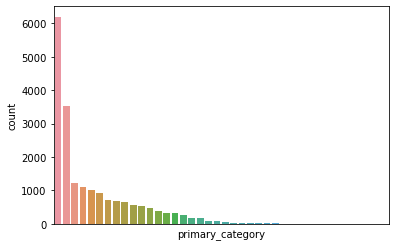

In [9]:
sns.countplot(df["primary_category"], order=df["primary_category"].value_counts().iloc[:40].index)

plt.xticks([], rotation = 90)

plt.show()

In [10]:
categories = df["primary_category"].value_counts()

print(categories)

Clothing                                                6197
Jewellery                                               3531
Footwear                                                1227
Mobiles & Accessories                                   1099
Automotive                                              1012
                                                        ... 
run of luck Solid Women's Round Neck Dark Blue T...        1
Starsy Solid Women's Round Neck Green T-Shirt              1
RajeshFashion Women's Leggings                             1
Dremel 2615.023.132 Plastic Friction Work Bench ...        1
SAY Thread Wounded Candle 10\" Set of 4 pcs Solid...       1
Name: primary_category, Length: 265, dtype: int64


In [11]:
def get_main_primary_categories(category):
    if categories[category] >= 10:
        return category
    else:
        return np.nan

df["primary_category"] = df["primary_category"].apply(get_main_primary_categories)

df.head(3)

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear


In [12]:
df.dropna(inplace = True)

In [13]:
print(df.shape)

(19666, 2)


In [14]:
print(len(df["primary_category"].unique()))

28


C:\Users\kusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


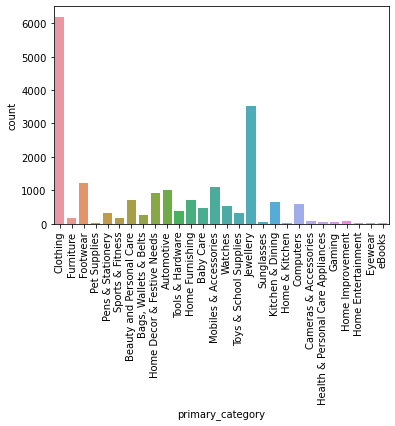

In [15]:
sns.countplot(df["primary_category"])

plt.xticks(rotation = 90)

plt.show()

In [16]:
final_categories = df["primary_category"].value_counts()

print(final_categories)

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             40
Gaming                                 35
Pet Supplies                      

In [17]:
with open('final_categories.txt', 'w') as file:
    for category in df["primary_category"]:
        file.write(category + '\n')

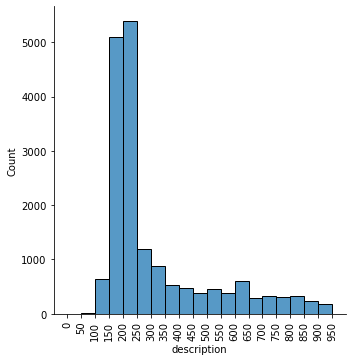

In [18]:
# Description cleaning and preprocessing begins here

bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.len(), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of characters present in each description lies between 100 and 950 and mostly falls between 100 and 350

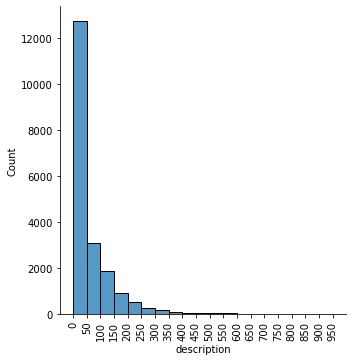

In [19]:
bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.split().apply(lambda x: len(x)), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of words present in each description lies between 0 and 400 and mostly falls between 0 and 150

<AxesSubplot:>

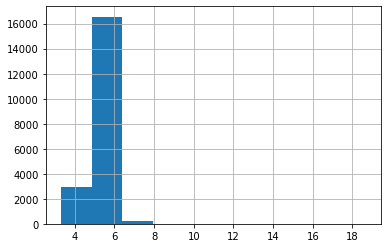

In [20]:
df['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# average word length in each description lies between 4 to 6 

In [21]:
# The graph is left skewed due to the no of stopwords in description 
# Analyzing the amount and the types of stopwords can give us some good insights into the data

stops = set(stopwords.words('english'))

print(stops)

{'off', "isn't", 'then', 'where', 'our', 'just', 'over', 'own', "mightn't", 'weren', "hadn't", 'isn', 'were', 'into', 'after', 'those', 'with', 'aren', 'hers', "didn't", 'himself', 'has', 'o', 'do', "you've", 'having', 'few', 'needn', "that'll", 'further', 'while', 'being', 'wouldn', 'don', "shan't", "she's", "don't", 'its', "hasn't", 'mightn', 'again', 'haven', 'his', 'am', 'between', 'each', 'wasn', 'him', 'ours', 'is', 'below', 'doesn', 'these', 're', 'the', 'hadn', 'up', 'you', "couldn't", 'in', "you're", 'than', 'yourselves', 'from', 'won', 'down', 'an', 'nor', 'shouldn', 'but', 'until', "you'd", 'because', 'did', 'we', 'and', 'she', "doesn't", 'there', 'why', "haven't", 'couldn', 'once', 'no', 's', 'itself', 'very', "should've", 'doing', 'how', 'at', 'does', 'for', "weren't", 'me', 'm', "shouldn't", 'more', 'to', 'now', 'myself', 'y', 'yours', 'was', 'a', 'that', 'other', 'had', 'of', "aren't", 'ourselves', 'them', 'not', 'too', 'when', 'll', 'against', 'can', 'same', 'my', 'who'

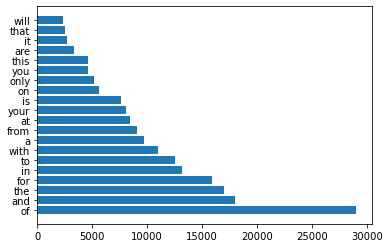

In [22]:
corpus = []
new = df['description'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stops:
        dic[word] += 1
        
top_stopwords = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:20] 
x, y = zip(*top_stopwords)
plt.barh(x, y)
plt.show()

# we can can clearly see that stopwords such as ('of', 'and', 'the', ..) appear very frequently in the desription column

<AxesSubplot:>

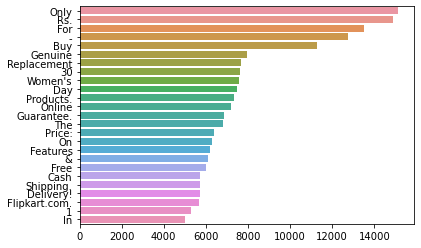

In [23]:
# apart from stopwords, we need to find the words which appear the most in the description 

from collections import Counter
counter = Counter(corpus)
most_comm = counter.most_common()

x, y= [], []
for word, count in most_comm[:40]:
    if word not in stops:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

# we can clearly see that we have some top stopwords in other cases also, and words such as ('Genuine', 'Women's', 
# 'Replacement') occur very frequently

<AxesSubplot:>

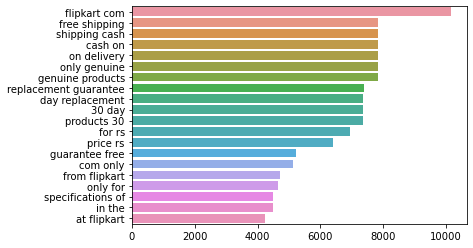

In [24]:
# Ngram exploration
# Looking at most frequent n-grams can give you a better understanding of the context 

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams = get_top_ngrams(df["description"], 2)[:20] 
x, y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)

# we can see some top bigrams contain phrases such as free shipping, flipkart com, cash on, only genuine etc
# which seem to be generic and not useful to classify products into their categories

<AxesSubplot:>

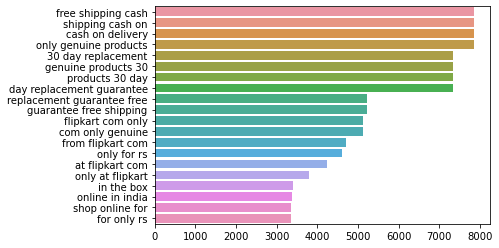

In [25]:
top_tri_grams = get_top_ngrams(df["description"], n=3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x=y, y=x)

# top trigrams too show the same behaviour of generic terms appearing frequently

In [26]:
my_stops = ['flipkart', 'com', 'shipping', 'cash', 'buy', 'products', 'online', 'shop', 'cash', 'delivery', 'free', 
           'genuine', 'replacement', '30', 'day', 'guarantee', 'rs', 'box', 'key', 'features', 'india', 'flipkart.com', 
            'details', 'specification', 'warranty', 'sale', 'purchase']

stops.update(my_stops)
stops.update(string.punctuation)

In [27]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [28]:
def preprocess_description(df):
    corpus = []
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    for desc in df["description"]:
        words = [w.lower() for w in word_tokenize(desc) if (w.lower() not in stops and w.isalpha() == True)]
        clean_words = []
        for w in words:
            if len(w) > 2:
                pos = nltk.pos_tag([w])
                clean_words.append(lemma.lemmatize(w, pos = get_simple_pos(pos[0][1])))
        corpus.append(clean_words)
    return corpus

corpus = preprocess_description(df)
print(len(corpus))

19666


In [29]:
# saving the clean corpus for future use

with open('corpus.txt', 'w', encoding="utf-8") as file:
    for row in corpus:
        file.write(' '.join(row) + '\n')

In [30]:
import gensim

dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

C:\Users\kusha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.039*"woman" + 0.022*"men" + 0.019*"fabric" + 0.019*"casual" + 0.019*"brand" + 0.018*"print" + 0.018*"cotton" + 0.017*"collection" + 0.016*"solid" + 0.015*"apparel"'),
 (1,
  '0.022*"cover" + 0.018*"design" + 0.017*"necklace" + 0.016*"alloy" + 0.016*"price" + 0.012*"quality" + 0.012*"one" + 0.011*"add" + 0.010*"back" + 0.010*"set"'),
 (2,
  '0.013*"material" + 0.012*"color" + 0.010*"type" + 0.010*"inch" + 0.009*"price" + 0.009*"product" + 0.009*"cover" + 0.008*"specification" + 0.008*"general" + 0.007*"size"'),
 (3,
  '0.024*"gold" + 0.021*"diamond" + 0.016*"ring" + 0.014*"set" + 0.013*"yellow" + 0.013*"silver" + 0.012*"color" + 0.012*"type" + 0.011*"price" + 0.010*"model"')]

In [32]:
# import pyLDAvis.gensim

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
# vis

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stops,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        normalize_plurals = True,
        random_state=1)
   
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [ ]:
with open("corpus.txt", 'r', encoding='utf-8') as file:
    data = list(file.readlines())

df["description"] = data

df.head(3)

In [ ]:
X = np.array(df["description"])
y = np.array(df["primary_category"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=73)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
count_vec = CountVectorizer()
X_train_features = count_vec.fit_transform(X_train)

In [ ]:
X_train_features.todense()

In [ ]:
count_vec.get_feature_names()

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_features, y_train)

In [ ]:
X_test_features = count_vec.transform(X_test)

X_test_features

In [ ]:
y_pred = clf.predict(X_test_features)

y_pred

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train_features, y_train)

In [ ]:
y_pred = rf.predict(X_test_features)

y_pred

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
tf_idf_vec = TfidfVectorizer(norm = None)

X_train_features = tf_idf_vec.fit_transform(X_train)

X_train_features

In [ ]:
X_test_features = tf_idf_vec.transform(X_test)

X_test_features

In [ ]:
clf = svm.SVC()
clf.fit(X_train_features, y_train)

In [ ]:
y_pred = clf.predict(X_test_features)

y_pred

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train_features, y_train)

In [ ]:
y_pred = rf.predict(X_test_features)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))